In [70]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
data=pd.read_csv('Housing.csv')

In [72]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [73]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [74]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [75]:
categorical_columns=data.select_dtypes(['object']).columns
categorical_columns=categorical_columns.drop('furnishingstatus')

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
encoder=LabelEncoder()
for i in categorical_columns:
    data[i]=encoder.fit_transform(data[i])

In [78]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [79]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse_output=False)
furnishingstatus_encoded=encoder.fit_transform(data[['furnishingstatus']])  
furnishingstatus_data=pd.DataFrame(furnishingstatus_encoded,columns=encoder.get_feature_names_out(['furnishingstatus']))
data=pd.concat([data,furnishingstatus_data],axis=1)
data.drop('furnishingstatus',axis=1,inplace=True)   
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0,0.0


In [80]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0,0.0


In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_columns=data.select_dtypes(include=['int64','float64']).columns
numerical_columns=numerical_columns.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus_semi-furnished','furnishingstatus_unfurnished'])
data[numerical_columns]=scaler.fit_transform(data[numerical_columns])


In [82]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0.0,0.0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0.0,0.0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1.0,0.0
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0.0,0.0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0.0,0.0


In [83]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data.drop('price',axis=1), data['price'], test_size=0.2, random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(436, 13) (109, 13) (436,) (109,)


In [86]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_X,train_y)
y_pred=model.predict(test_X)


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
r2=r2_score(test_y,y_pred)

print(f"Mean Absolute Error:{mae}")
print(f"Mean Squared Error:{mse}")
print(f"R^2 Score:{r2}")

Mean Absolute Error:0.5190943190276343
Mean Squared Error:0.5023642289784899
R^2 Score:0.6529242642153175


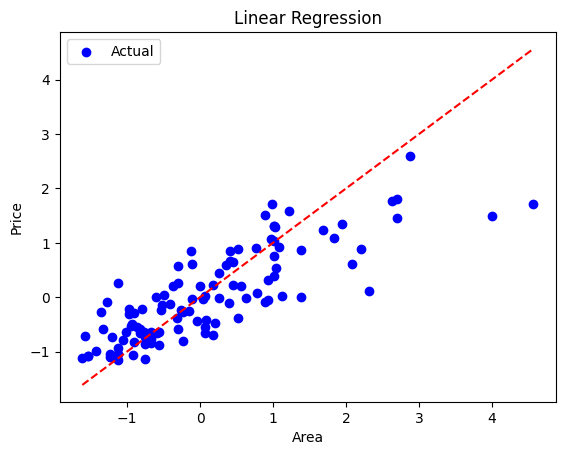

In [95]:
plt.scatter(test_y,y_pred,color='blue',label='Actual')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [98]:
intercept=model.intercept_

coefficients=model.coef_
features=train_X.columns

equation=f"price={intercept:.2f}"
for feature,coef in zip(features, coefficients):
    equation+=f"+({coef:.2f}*{feature})"

print("Regression Line:")
print(equation)


Regression Line:
price=-0.41+(0.27*area)+(0.03*bedrooms)+(0.29*bathrooms)+(0.19*stories)+(0.20*mainroad)+(0.12*guestroom)+(0.21*basement)+(0.37*hotwaterheating)+(0.42*airconditioning)+(0.10*parking)+(0.34*prefarea)+(-0.07*furnishingstatus_semi-furnished)+(-0.22*furnishingstatus_unfurnished)
